<a href="https://colab.research.google.com/github/Pysrdafoice/Marchine_Learning1/blob/main/Regressao%2Bderivada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados de exemplo (simulados)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 valores de entrada
y = 4 + 3 * X + np.random.randn(100, 1)  # Regra de y = 4 + 3 * X + ruído



In [ ]:

# Função de custo: MSE (erro quadrático médio)
def compute_cost(X, y, w, b):
    m = len(y)
    cost = (1/(2*m)) * np.sum((X.dot(w) + b - y)**2)
    return cost

# Função de gradiente: Calcula as derivadas em relação a w e b
def compute_gradient(X, y, w, b):
    m = len(y)
    w_gradient = (1/m) * np.dot(X.T, (X.dot(w) + b - y))
    b_gradient = (1/m) * np.sum(X.dot(w) + b - y)
    return w_gradient, b_gradient

# Função de gradiente descendente
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    cost_history = []
    for i in range(num_iterations):
        w_gradient, b_gradient = compute_gradient(X, y, w, b)
        w = w - learning_rate * w_gradient  # Atualizando pesos
        b = b - learning_rate * b_gradient  # Atualizando intercepto
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return w, b, cost_history


In [ ]:
# Inicializando parâmetros
w = np.random.randn(1)  # Inicializando o peso de forma aleatória
b = 0  # Inicializando o intercepto
learning_rate = 0.01
num_iterations = 1000

# Aplicando gradiente descendente
w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, num_iterations)

# Exibindo os resultados
print(f"Peso final: {w}")
print("----")
print(f"Custo histórico: {cost_history}")
print("----")
print(f"Custo final: {cost_history[-1]}")
print("----")
print(f"Intercepto final: {b}")


Iteration 0: Cost 166.744868588938
Iteration 100: Cost 103.26790086179365
Iteration 200: Cost 71.71004194381194
Iteration 300: Cost 55.97549828869338
Iteration 400: Cost 48.130356930633184
Iteration 500: Cost 44.218820359725896
Iteration 600: Cost 42.26855360894802
Iteration 700: Cost 41.29616326304435
Iteration 800: Cost 40.81133574679309
Iteration 900: Cost 40.5696038934231
Peso final: [[2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.68712466
  2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.68712466
  2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.68712466
  2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.68712466
  2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.68712466
  2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.68712466
  2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.68712466
  2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.68712466
  2.68712466 2.68712466 2.68712466 2.68712466 2.68712466 2.687124

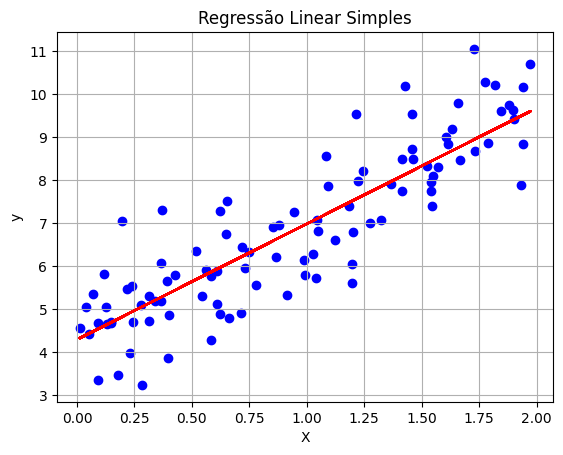

In [ ]:
# Plotando a linha de regressão e os dados
plt.scatter(X, y, color='blue', label='Dados Originais')
plt.plot(X, X.dot(w) + b, color='red', label='Linha de Regressão')
plt.title('Regressão Linear Simples')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
import random

def gera_populacao_inicial(num_individuos, tamanho_cromossomo):
    # Cada indivíduo é uma lista representando a ordem dos itens em cada pacote
    populacao = []
    for _ in range(num_individuos):
        individuo = random.sample(range(tamanho_cromossomo), tamanho_cromossomo)
        populacao.append(individuo)
    return populacao

def calcula_aptidao(individuo, itens, capacidade_pacote):
    # Calcula o número de pacotes necessários para o indivíduo
    pacotes = [0]
    for item in individuo:
        if sum(pacotes) + itens[item] > capacidade_pacote:
            pacotes.append(0)
        pacotes[-1] += itens[item]
    return len(pacotes)

def selecao(populacao, aptidoes):
    # Seleção por roleta viciada
    total_aptidao = sum(aptidoes)
    probabilidades = [aptidao / total_aptidao for aptidao in aptidoes]
    return random.choices(populacao, weights=probabilidades, k=2)

def crossover(pai1, pai2):
    # Crossover de um ponto
    ponto_corte = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    return filho1, filho2

def mutacao(individuo,
 taxa_mutacao):
    # Mutação por troca de dois genes
    for i in range(len(individuo)):
        if random.random() < taxa_mutacao:
            j = random.randint(0, len(individuo) - 1)
            individuo[i], individuo[j] = individuo[j], individuo[i]
    return individuo

# Parâmetros
num_itens = 10
capacidade_pacote = 15
itens = [5, 3, 7, 2, 8, 4, 6, 1, 9, 5]  # Exemplo de pesos dos itens
num_individuos = 100
geracoes = 100
taxa_mutacao = 0.01

# Inicialização
populacao = gera_populacao_inicial(num_individuos, num_itens)

# Loop principal
for geracao in range(geracoes):
    aptidoes = [calcula_aptidao(individuo, itens, capacidade_pacote) for individuo in populacao]
    nova_populacao = []
    for _ in range(num_individuos // 2):
        pai1, pai2 = selecao(populacao, aptidoes)
        filho1, filho2 = crossover(pai1, pai2)
        filho1 = mutacao(filho1, taxa_mutacao)
        filho2 = mutacao(filho2, taxa_mutacao)
        nova_populacao.extend([filho1, filho2])
    populacao = nova_populacao

# Encontrar a melhor solução
melhor_individuo = min(populacao, key=lambda x: calcula_aptidao(x, itens, capacidade_pacote))
print("Melhor solução:", melhor_individuo)
print("Número de pacotes:", calcula_aptidao(melhor_individuo, itens, capacidade_pacote))

Melhor solução: [6, 7, 7, 8, 9, 8, 7, 8, 8, 2]
Número de pacotes: 8
